In [2]:
from torchvision.datasets import EMNIST, ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
emnist_train = EMNIST(root="./datasets/", split="balanced", train=True, transform=ToTensor())
emnist_test = EMNIST(root="./datasets/", split="balanced", train=False, transform=ToTensor())

100.0%


Extracting ./datasets/EMNIST/raw/gzip.zip to ./datasets/EMNIST/raw


In [22]:
dida = ImageFolder(root="./datasets/DIDA", transform=ToTensor())

In [7]:
cardis = ImageFolder(root="./datasets/CARDIS", transform=ToTensor())

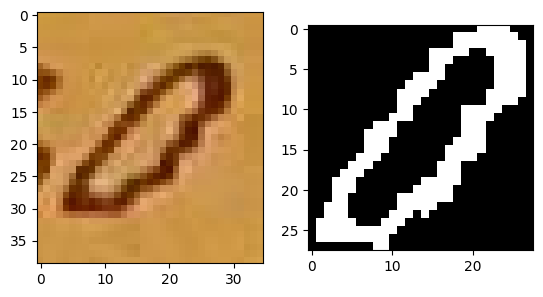

In [26]:
import transforms as ts
import matplotlib.pyplot as plt
from importlib import reload
reload(ts)

fig, (ax1, ax2) = plt.subplots(1, 2)

img = dida.__getitem__(15)[0].squeeze().numpy().transpose(1, 2, 0)
ax1.imshow(img, interpolation='nearest', cmap='grey')

img = ts.emnist_transform(img)
#print(img[0])
ax2.imshow(img[0][0].squeeze(), interpolation='nearest', cmap='grey')

plt.show()

0


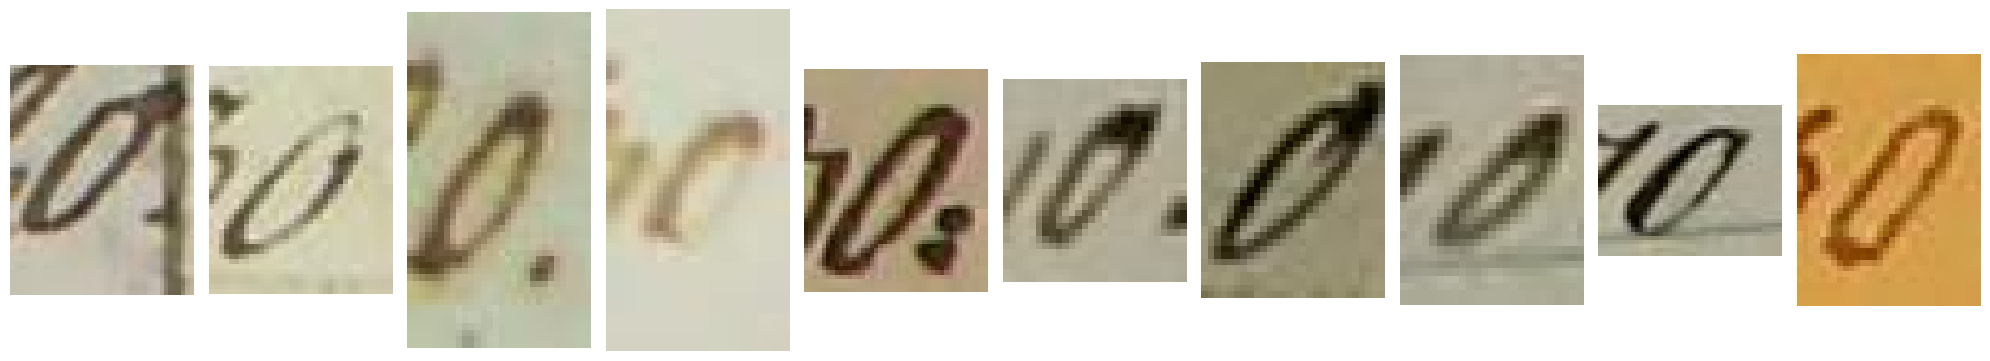

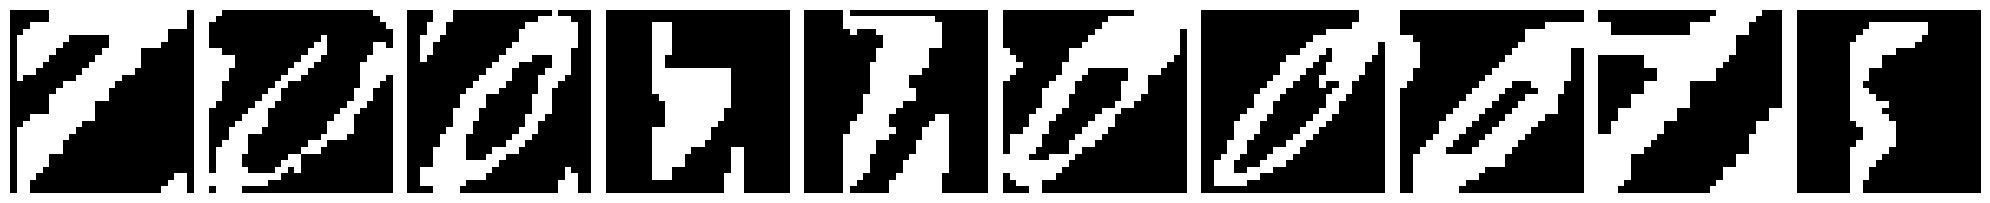

1


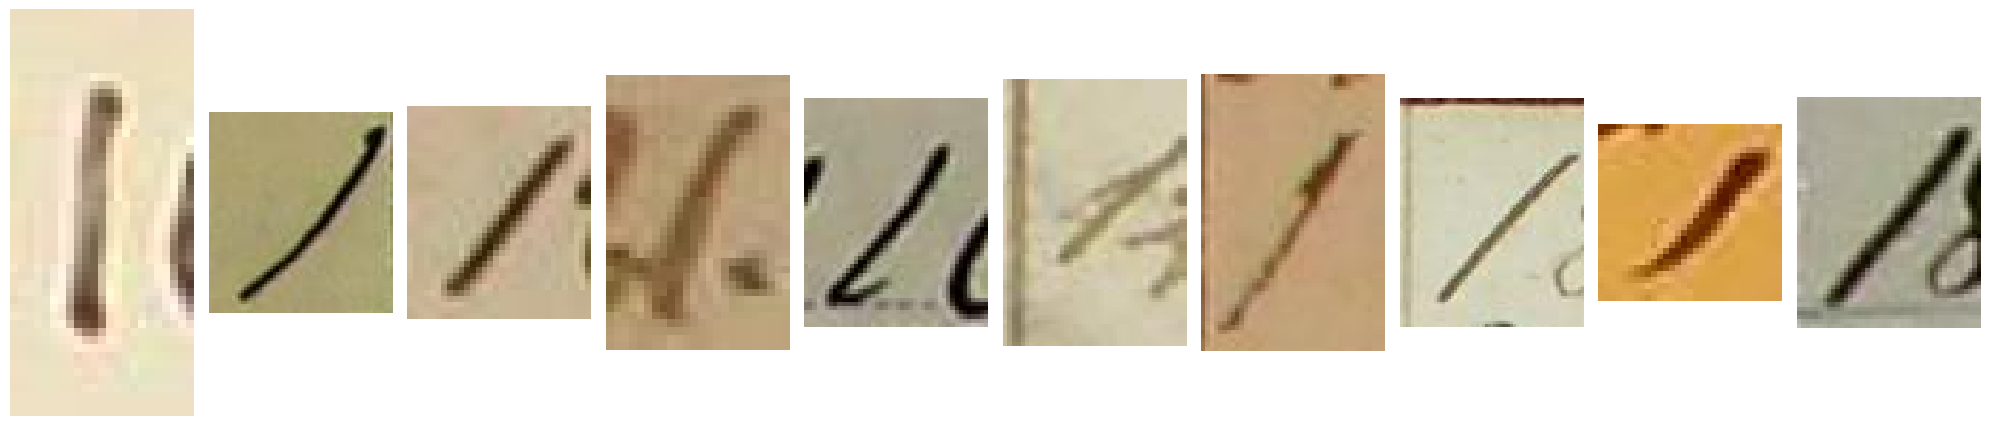

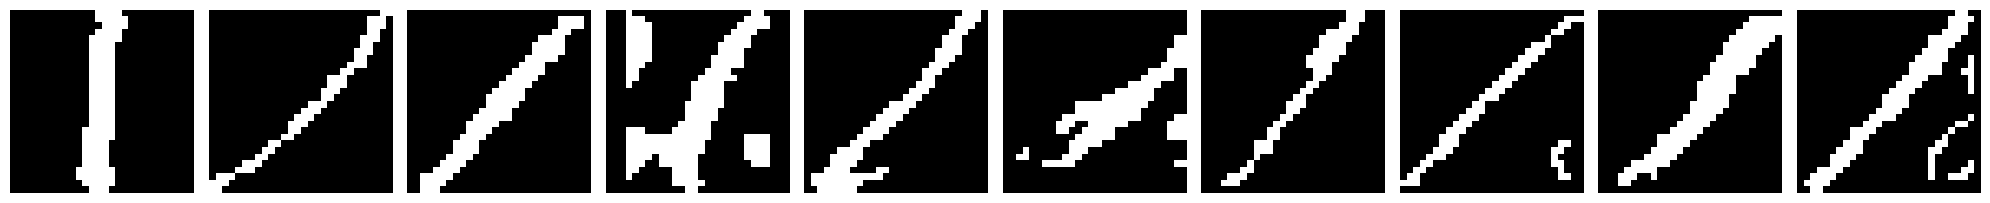

2


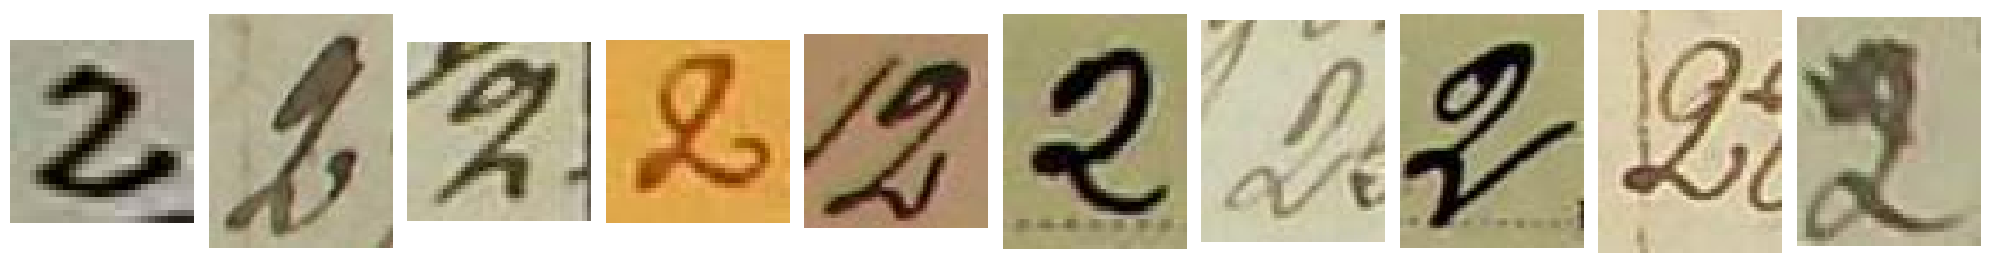

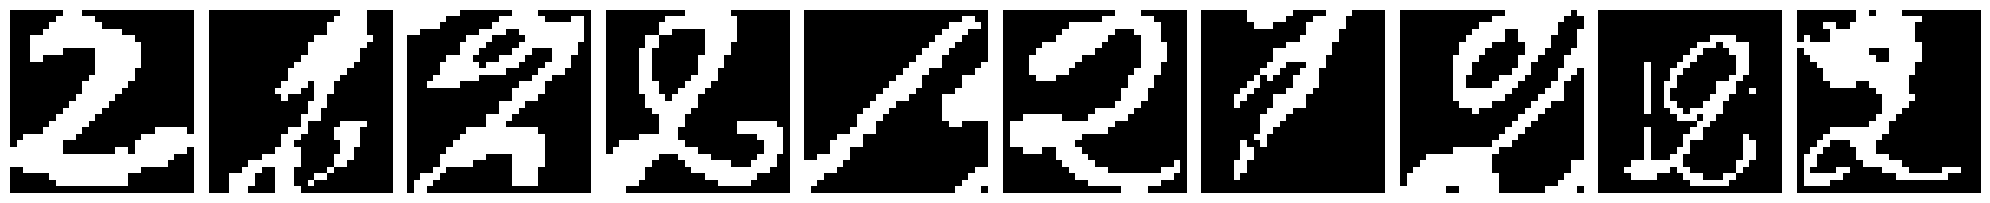

3


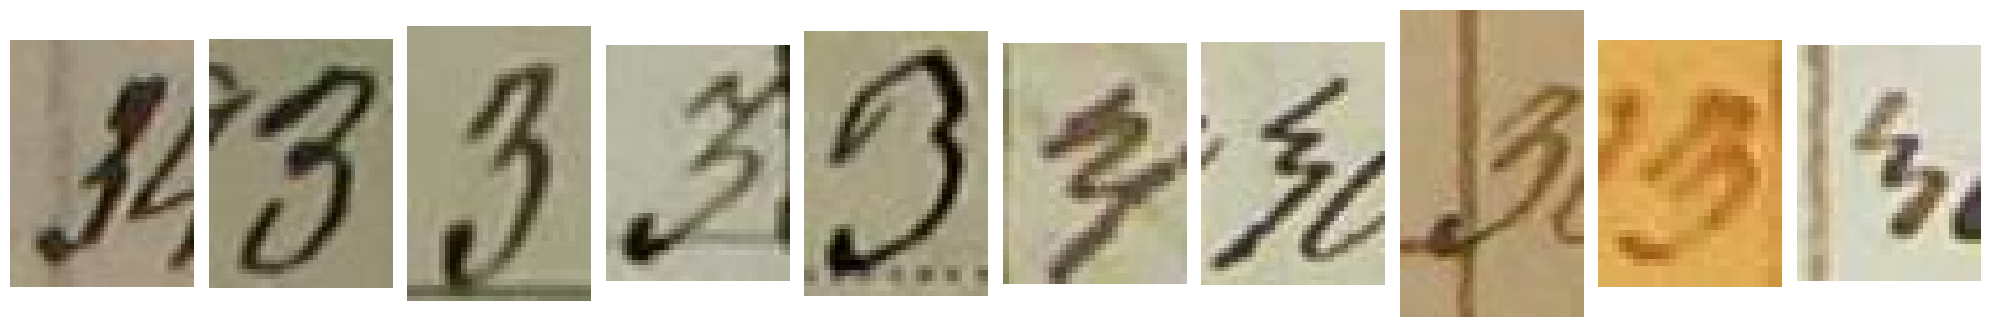

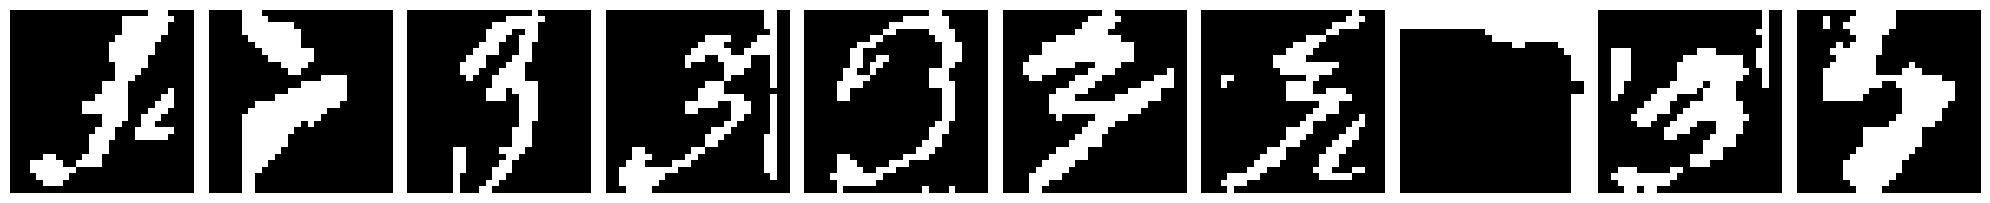

4


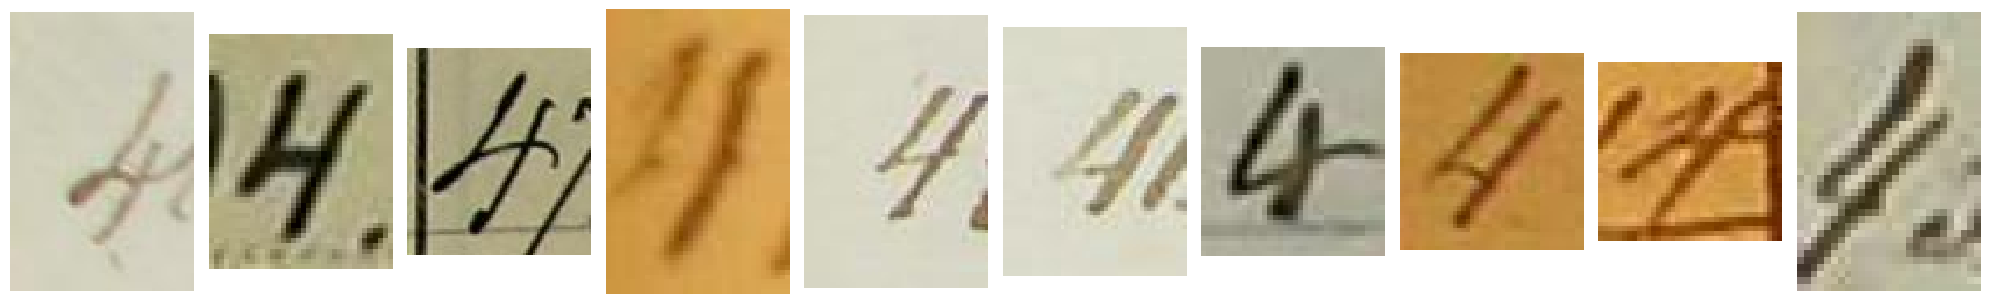

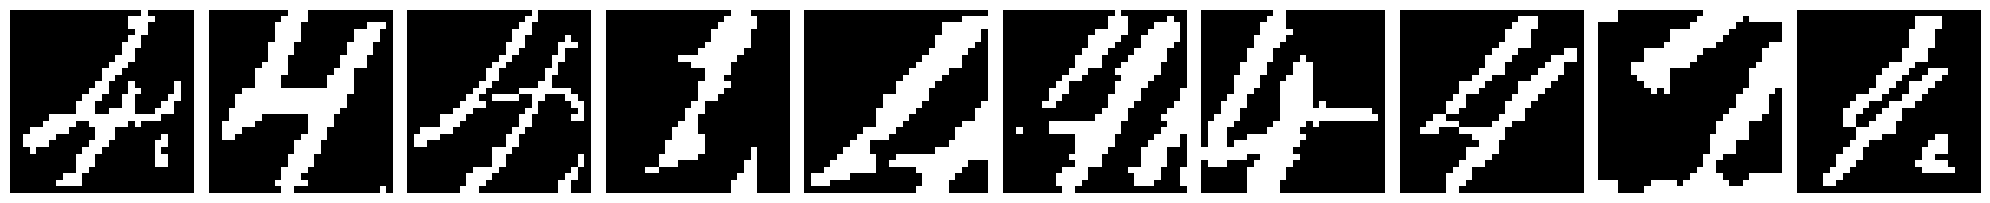

5


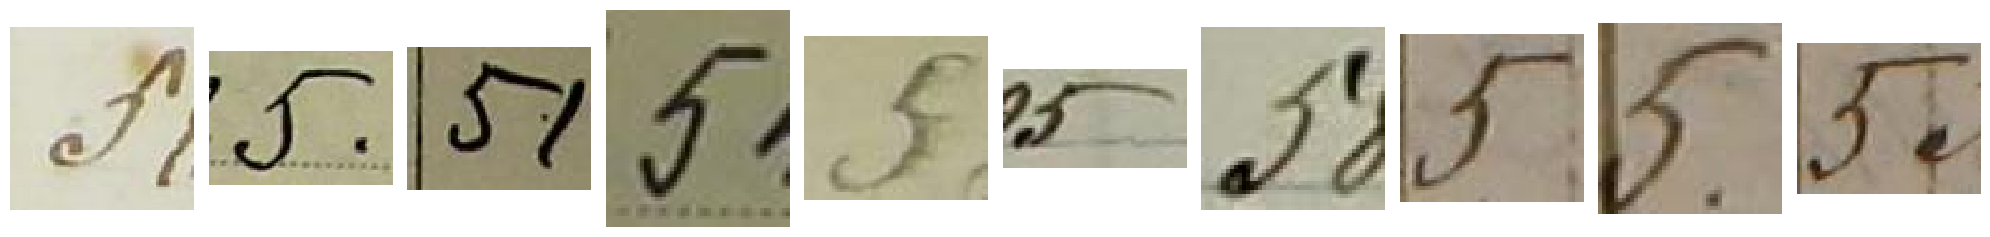

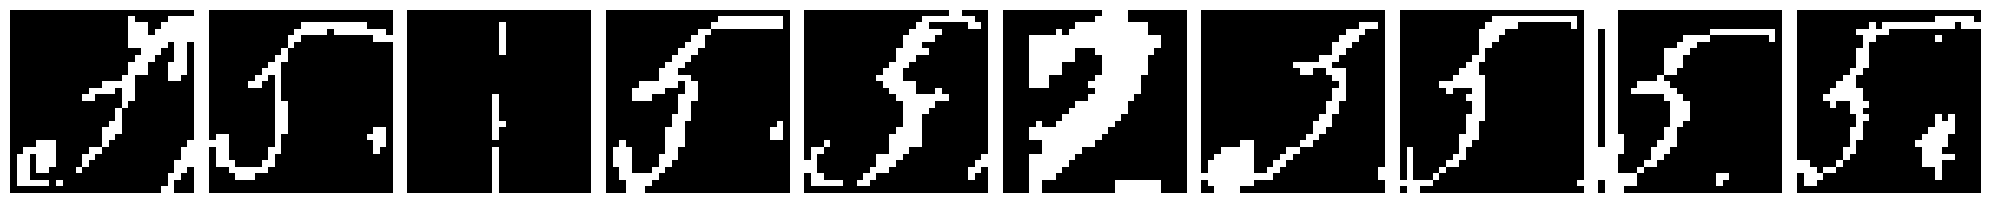

6


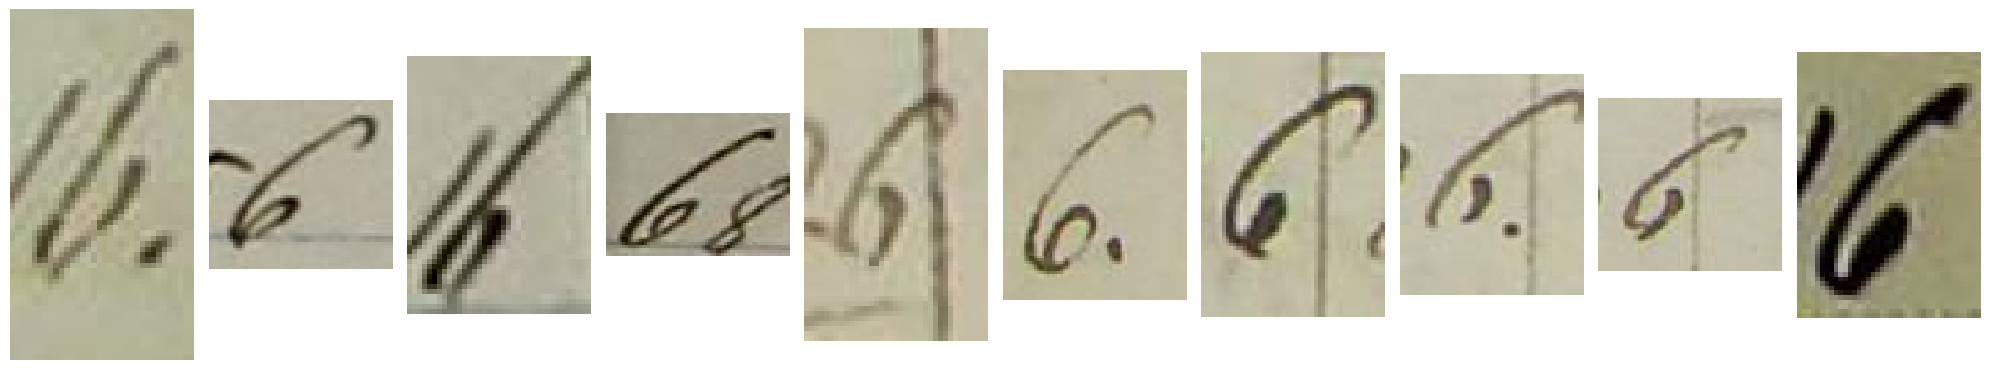

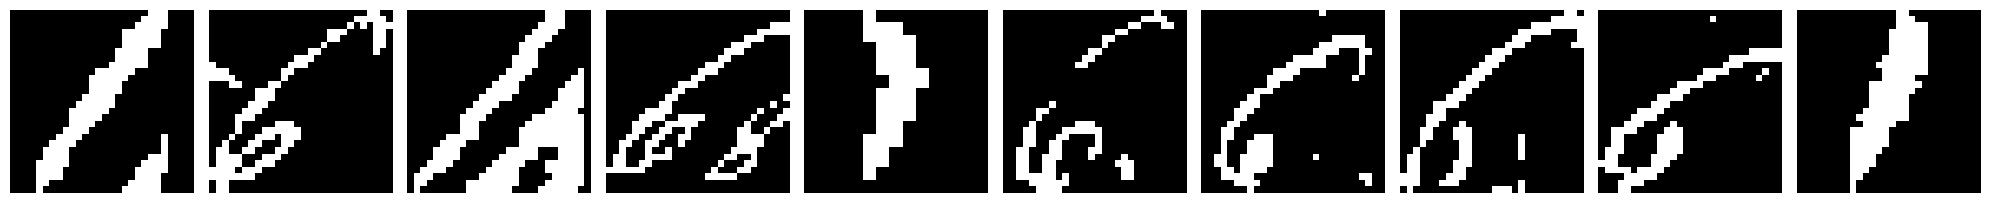

7


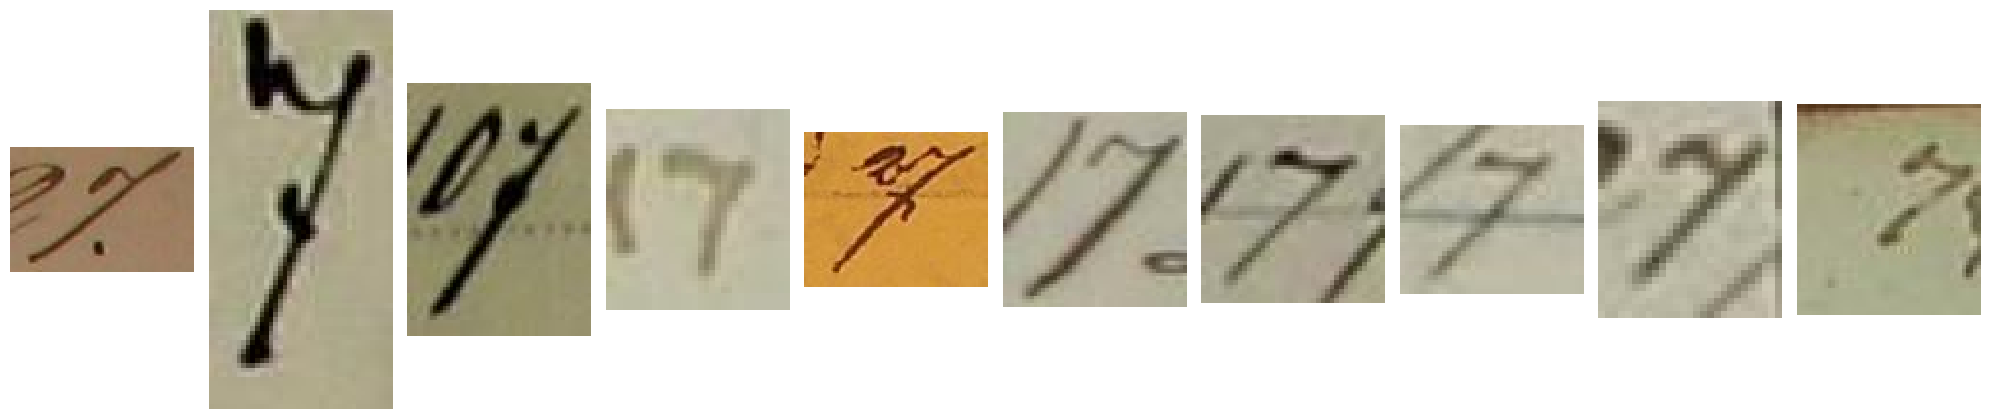

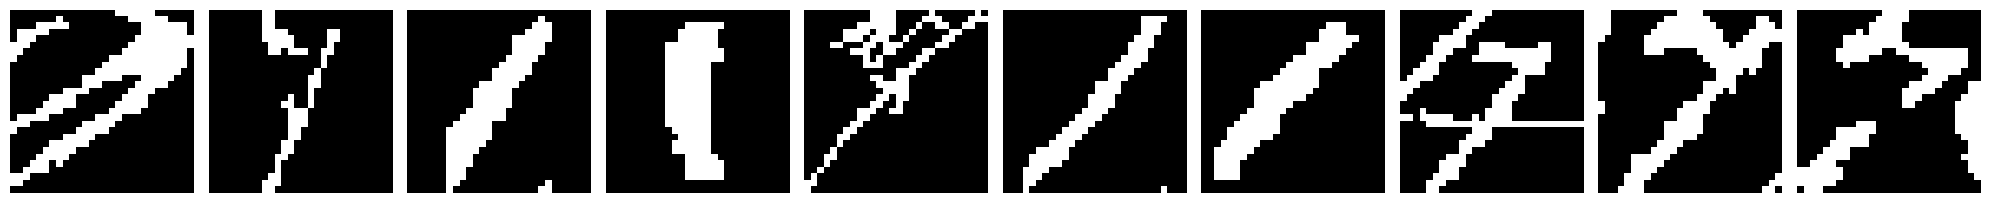

8


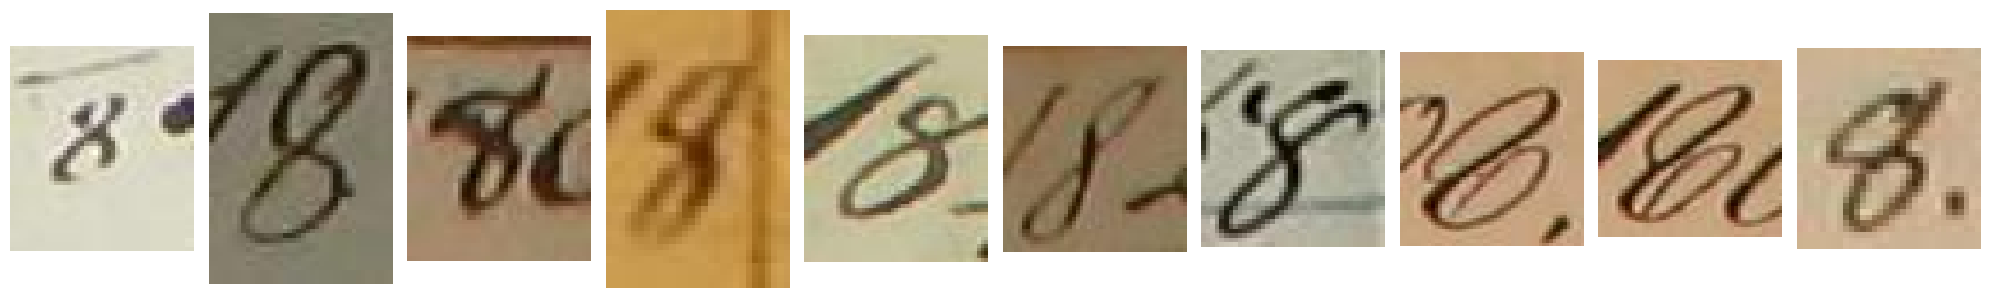

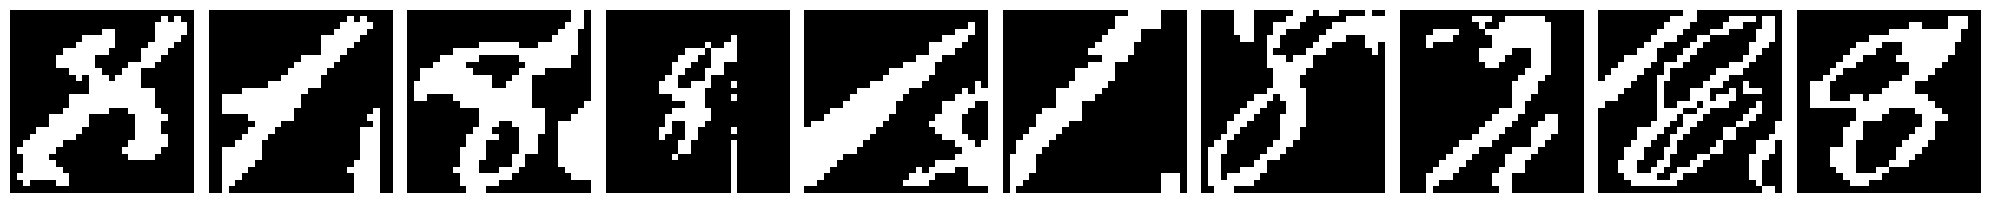

9


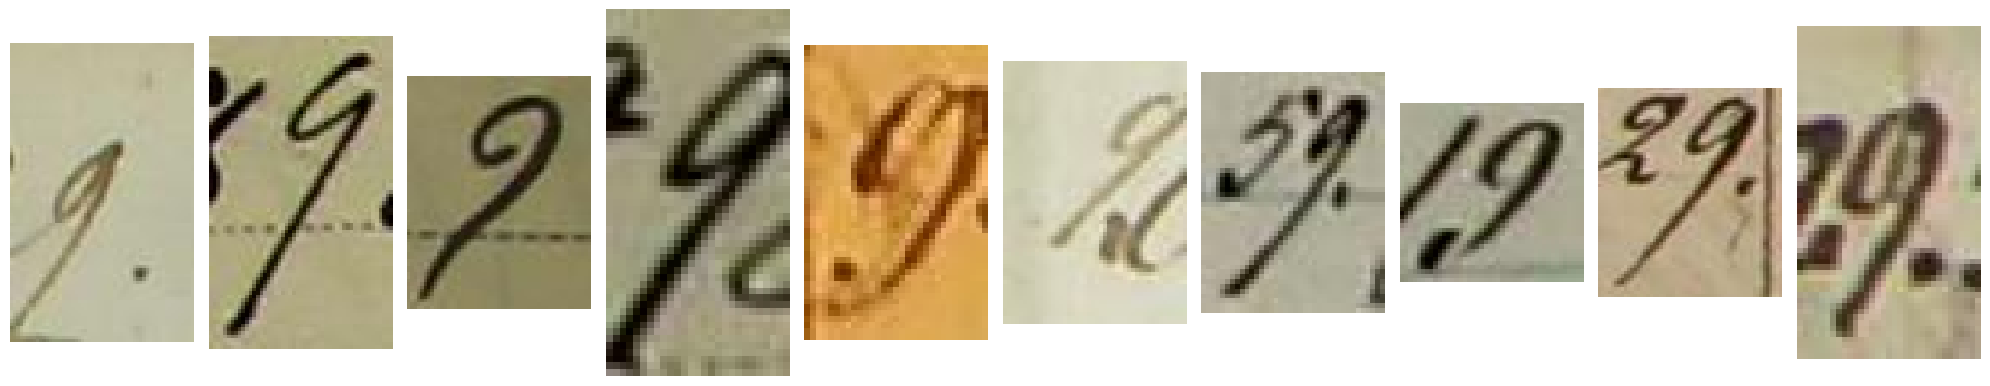

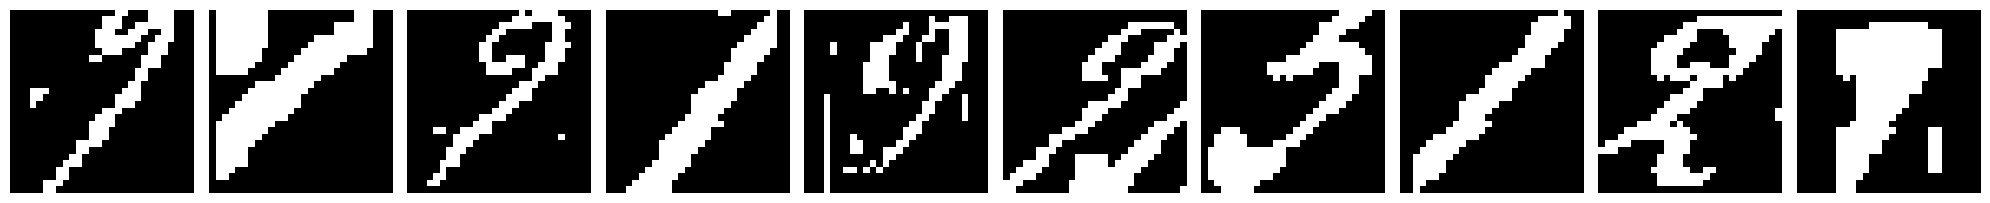

In [33]:
import matplotlib.pyplot as plt

NUM_IMAGES = 10
FIGSIZE = (20, 5) 


def display_images(dataset, transform=None, num_images=10):

    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=FIGSIZE)

    for i, ax in enumerate(axes):

        img = dataset.__getitem__(i)[0].squeeze().numpy().transpose(1, 2, 0)

        if transform:
            transformed_img = transform(img)
            img = transformed_img[0][0].squeeze()

        ax.imshow(img, interpolation='nearest', cmap='grey')
        ax.axis('off') 

    plt.tight_layout()
    plt.show()



label_counts = Counter(dida.targets)

for target_class in sorted(label_counts.keys()):

    print(target_class)
  
    filtered_indices = [i for i, label in enumerate(dida.targets) if label == target_class]
    filtered_dataset = [(dida[i][0], dida.targets[i]) for i in filtered_indices]
    
    display_images(filtered_dataset,num_images=NUM_IMAGES)
    display_images(filtered_dataset, transform=ts.emnist_transform, num_images=NUM_IMAGES)
